In [6]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data= pd.read_csv('cars24_car_price.csv')
data.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti SX4 Zxi BSIII,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0
1,Hyundai i20 Sportz 1.4 CRDi,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0
2,Maruti Swift VDI BSIV,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0
3,Honda City 1.3 EXI,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0
4,Volkswagen Polo 1.2 MPI Comfortline,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0


Notice that Variable full_name contains both Maker and Model information - need to extract make and model from full_name.

In [8]:
data.shape

(13986, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13986 entries, 0 to 13985
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          13986 non-null  object 
 1   selling_price      13986 non-null  float64
 2   year               13986 non-null  float64
 3   seller_type        13986 non-null  object 
 4   km_driven          13986 non-null  int64  
 5   fuel_type          13986 non-null  object 
 6   transmission_type  13986 non-null  object 
 7   mileage            13986 non-null  float64
 8   engine             13986 non-null  float64
 9   max_power          13986 non-null  float64
 10  seats              13986 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


In [10]:
data.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,13986.000000,13986.000000,1.398600e+04,13986.000000,13986.000000,13986.000000,13986.000000
mean,7.377749,2014.516088,5.797629e+04,19.356221,1473.574905,97.685631,5.313242
std,9.368596,3.256795,5.378180e+04,4.638576,518.289204,45.067944,0.831653
min,0.325000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.100000e+04,16.840000,1197.000000,73.900000,5.000000
50%,5.100000,2015.000000,5.120000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.800000,2017.000000,7.397800e+04,22.320000,1582.000000,112.000000,5.000000
max,395.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


selling_price ranges from [0.25, 395] - the values seem to be in lakhs (100 thousands ).

In [11]:
data['selling_price'].min()

0.325

In [12]:
data.iloc[2]

full_name            Maruti Swift VDI BSIV
selling_price                         5.25
year                                2015.0
seller_type                     Individual
km_driven                            70000
fuel_type                           Diesel
transmission_type                   Manual
mileage                               25.2
engine                              1248.0
max_power                             74.0
seats                                  5.0
Name: 2, dtype: object

mileage min is 0, max is 120 - need to check for outliers.

engine min is 0, max is 6752 - values appear to be in "cc" - need to check for outliers.

# Distributions

<Axes: >

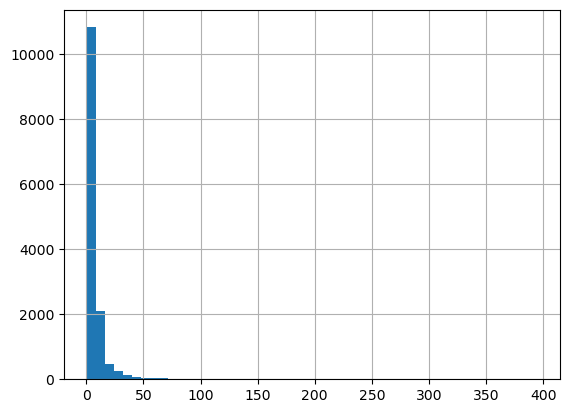

In [13]:
data['selling_price'].hist(bins=50)

Lets check the percntage of outliers. We are manually taking a call that price over 100(k) is an outlier by looking at the above plot

In [14]:
(data.loc[data.selling_price >100].shape[0]/data.shape[0])*100

0.06435006435006435

Lets saturate selling price at 100.

In [15]:
data.loc[data.selling_price>100, 'selling_price']=100

<Axes: >

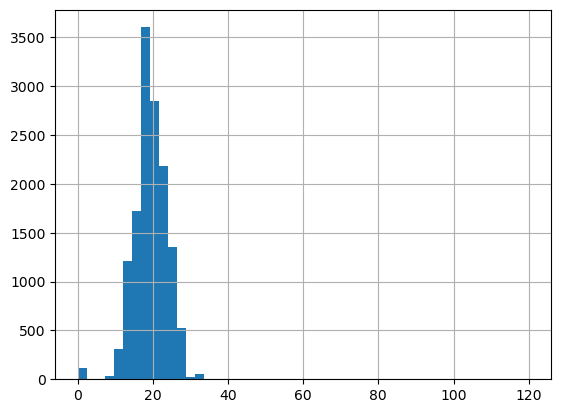

In [16]:
data['mileage'].hist(bins=50)

<Axes: xlabel='mileage', ylabel='Density'>

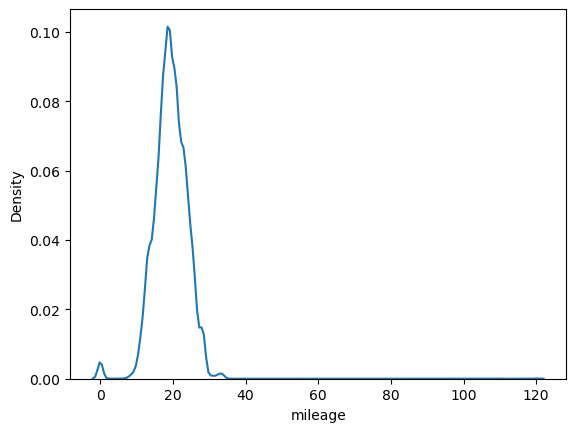

In [17]:
sns.kdeplot(data['mileage'])

We observe a skewed plot with right tail to long. An interesting point here would be mileage > 40, because after that it looks like the values mught just be outliers.

In [18]:
data[data['mileage']<=5].mileage.describe()

count    119.000000
mean       0.033613
std        0.366679
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: mileage, dtype: float64

Lets investigate mileage of the care =0 case as it is not real and not possible

In [19]:
data.loc[data.mileage==0].shape[0]/data.shape[0]

0.008437008437008437

In [20]:
data[data['mileage']==0.0].shape

(118, 11)

Thats a very small number of points. We can safely impute, or drop these points later during pre-processing

In [21]:
data[data['mileage']>40].mileage.describe()

count      3.000000
mean     116.666667
std        5.773503
min      110.000000
25%      115.000000
50%      120.000000
75%      120.000000
max      120.000000
Name: mileage, dtype: float64

In [22]:
data[data['mileage']>40]

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
4291,Mahindra e2o Premium,3.25,2013.0,Individual,50000,Electric,Automatic,120.0,0.000000,25.5,5.0
4751,Mahindra e2o T2,3.60,2015.0,Dealer,42862,Electric,Automatic,120.0,0.000000,25.5,5.0
4894,Mahindra e2oPlus P6,4.00,2018.0,Dealer,26000,Electric,Automatic,110.0,1476.327401,25.4,4.0


In [23]:
data[data['mileage']>40].fuel_type.value_counts()

Electric    3
Name: fuel_type, dtype: int64

So all vehicles with mileage > 40 are electric vehicles which makes sense.

So they are not incorrect (error) values.

In [24]:
data.dtypes

full_name             object
selling_price        float64
year                 float64
seller_type           object
km_driven              int64
fuel_type             object
transmission_type     object
mileage              float64
engine               float64
max_power            float64
seats                float64
dtype: object

<Axes: >

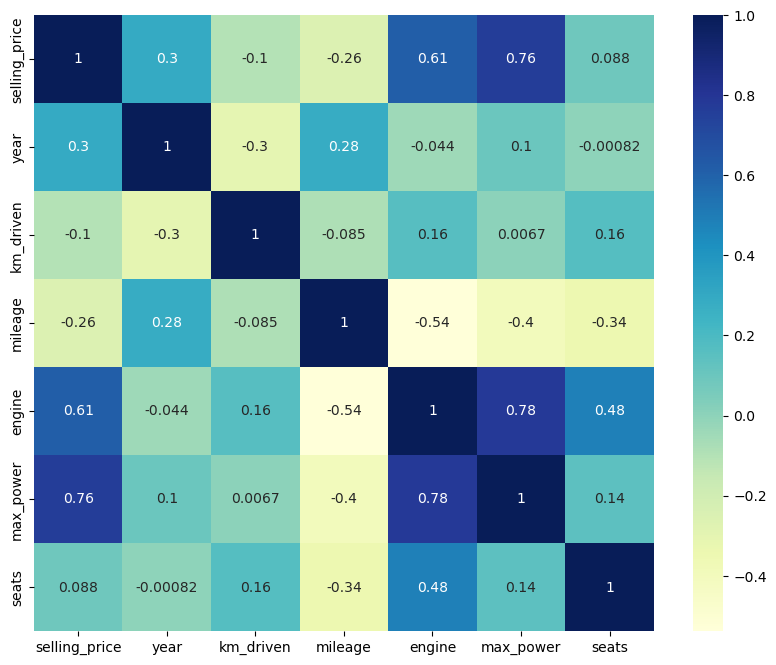

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

we see the following corelation

1.Engine and Max power

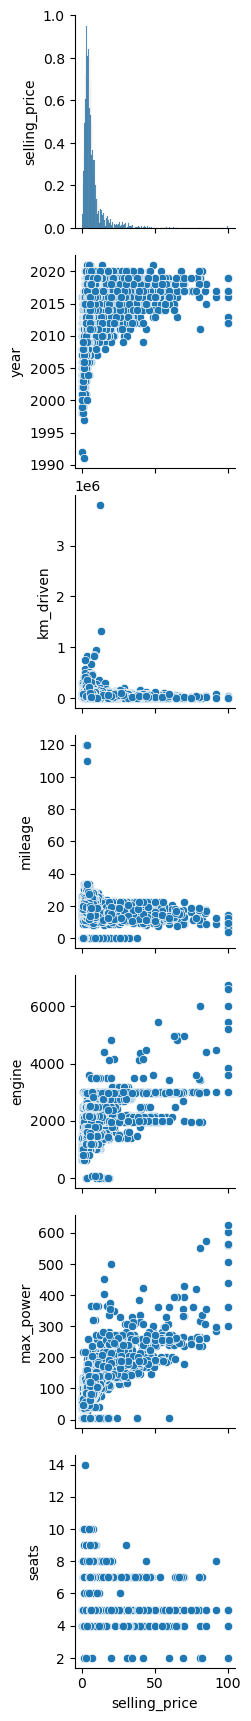

In [26]:
sns.pairplot(data,x_vars=['selling_price'])

In [27]:
data['seats'].value_counts(normalize=True)

5.0     0.837123
7.0     0.115902
8.0     0.022237
4.0     0.011440
6.0     0.007293
9.0     0.003432
10.0    0.001502
2.0     0.001001
14.0    0.000072
Name: seats, dtype: float64

In [28]:
#extracting model and make from the full name

In [29]:
data['make']=data.full_name.apply(lambda x:x.split()[0])
data['model'] = data.full_name.apply(lambda x:''.join(x.split()[1:]))
data.drop(columns=['full_name'],axis=1,inplace=True)
data.head()

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model
0,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0,Maruti,SX4ZxiBSIII
1,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0,Hyundai,i20Sportz1.4CRDi
2,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0,Maruti,SwiftVDIBSIV
3,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0,Honda,City1.3EXI
4,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0,Volkswagen,Polo1.2MPIComfortline


In [30]:
data.describe(include='object')

,seller_type,fuel_type,transmission_type,make,model
count,13986,13986,13986,13986,13986
unique,3,5,2,41,2918
top,Dealer,Petrol,Manual,Maruti,Alto800LXI
freq,8393,6870,11251,3979,143


In [31]:
data['fuel_type'].value_counts()

Petrol      6870
Diesel      6823
CNG          233
LPG           49
Electric      11
Name: fuel_type, dtype: int64

In [32]:
data['seller_type'].value_counts()

Dealer              8393
Individual          5450
Trustmark Dealer     143
Name: seller_type, dtype: int64

In [33]:
data['transmission_type'].value_counts()

Manual       11251
Automatic     2735
Name: transmission_type, dtype: int64

In [34]:
#Does selling price vary in dome of these groups

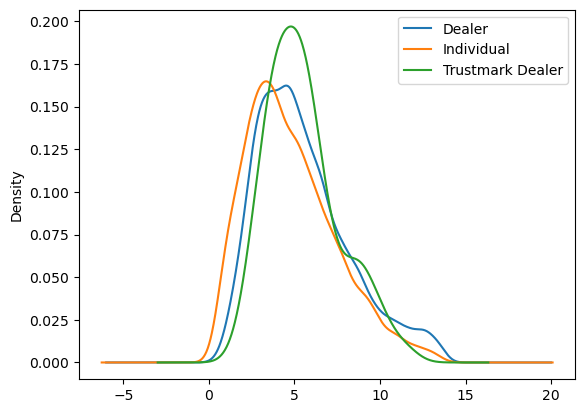

In [35]:
data.loc[data.selling_price<=data.selling_price.quantile(0.9)].groupby('seller_type')['selling_price'].plot.density();
plt.legend()

In [36]:
'''Another way to visualise the same is to use a plot known as box-plot

Note: Although, seats is numeric, but we will consider it as an ordinal variable and perform similar analysis as we do for other categorical variables.'''

'Another way to visualise the same is to use a plot known as box-plot\n\nNote: Although, seats is numeric, but we will consider it as an ordinal variable and perform similar analysis as we do for other categorical variables.'

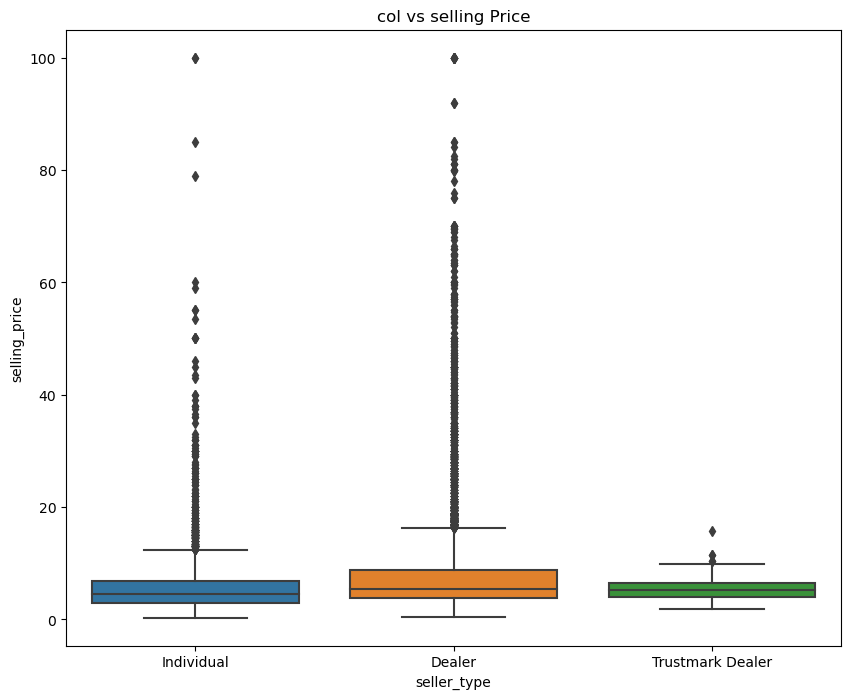

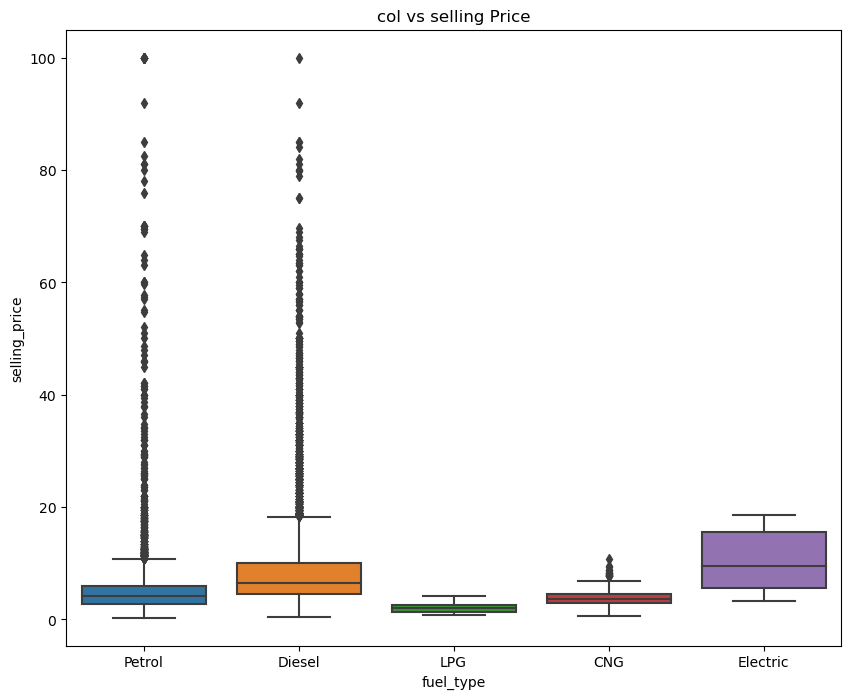

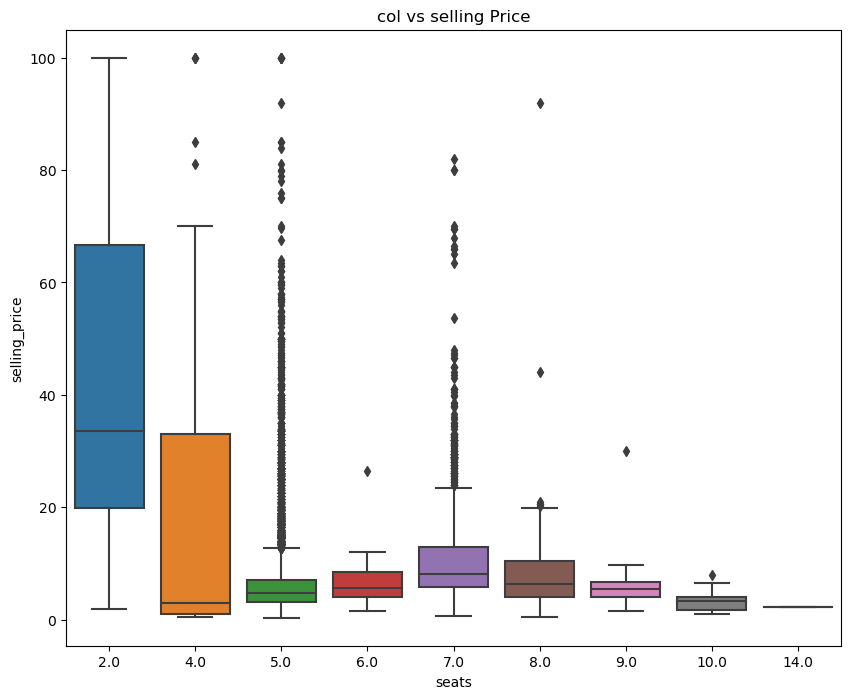

In [37]:
for i in ['seller_type','fuel_type','seats']:
    plt.figure(figsize=(10,8))
    sns.boxplot(y='selling_price',x=i,data=data)
    plt.title('col vs selling Price')
    plt.show()

In [38]:
#Scaling the selling_price for better visualization

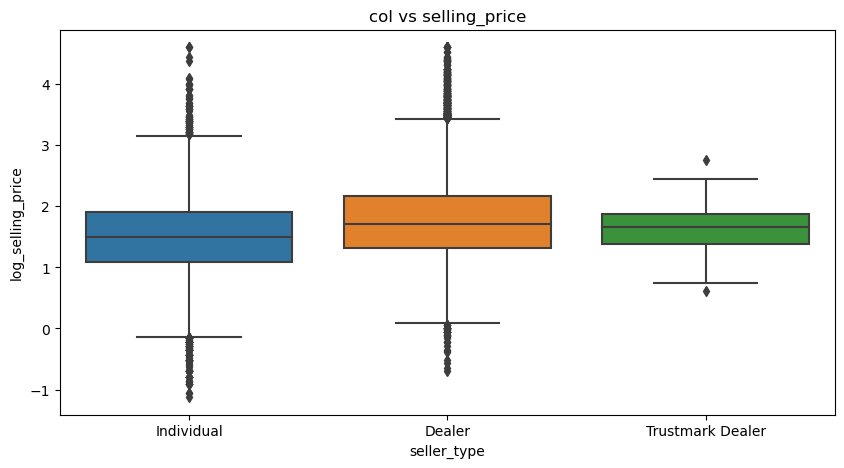

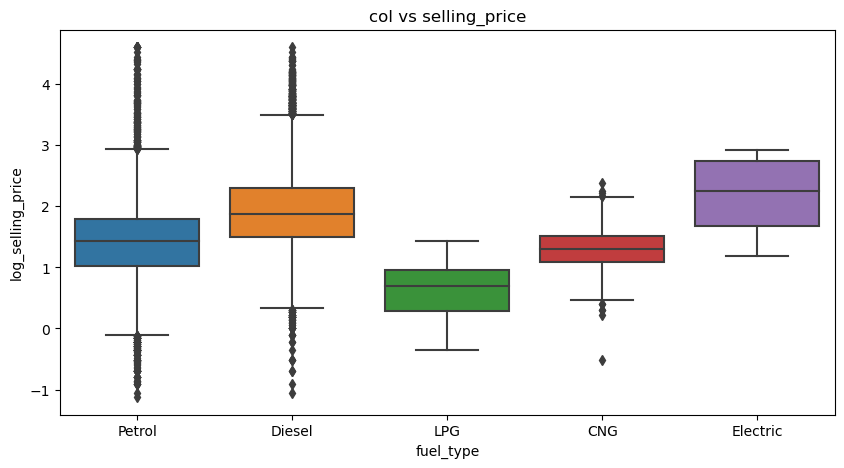

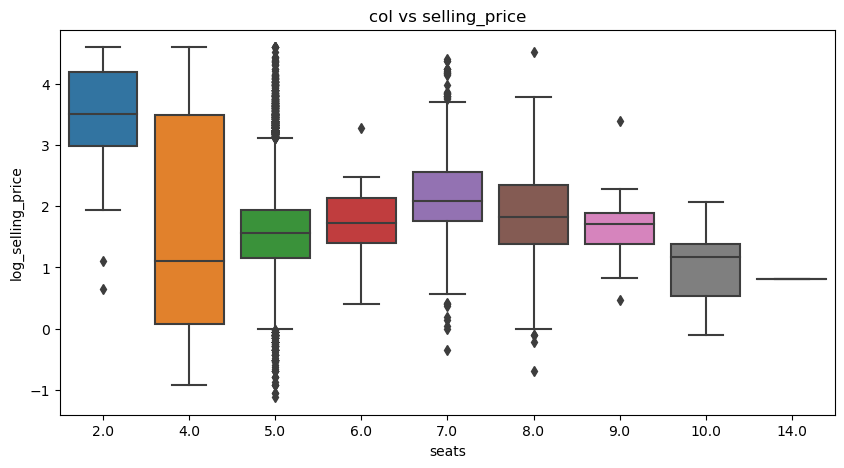

In [39]:
data["log_selling_price"] = np.log(data["selling_price"].values)
 
for col in ['seller_type', 'fuel_type', 'seats']:
    plt.figure(figsize=(10,5))
    sns.boxplot(y='log_selling_price',x=col, data=data)
    plt.title('col vs selling_price')
    plt.show()

In [40]:
len(data['make'].unique())

41

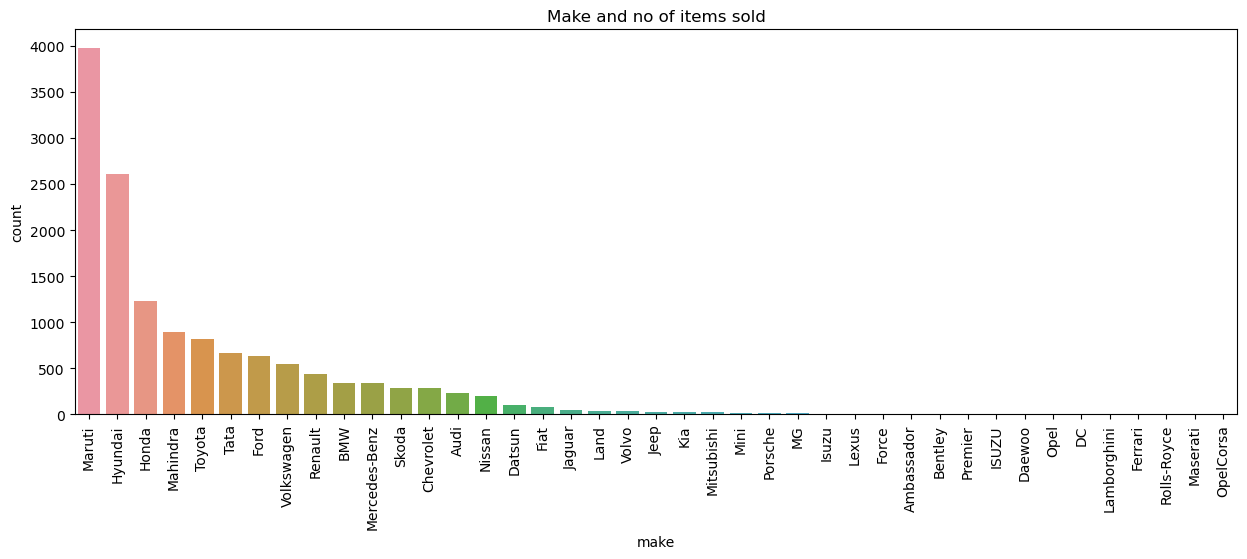

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(x='make',data=data,order=data['make'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Make and no of items sold')
plt.show()

In [42]:
#How make is related to the selling price?

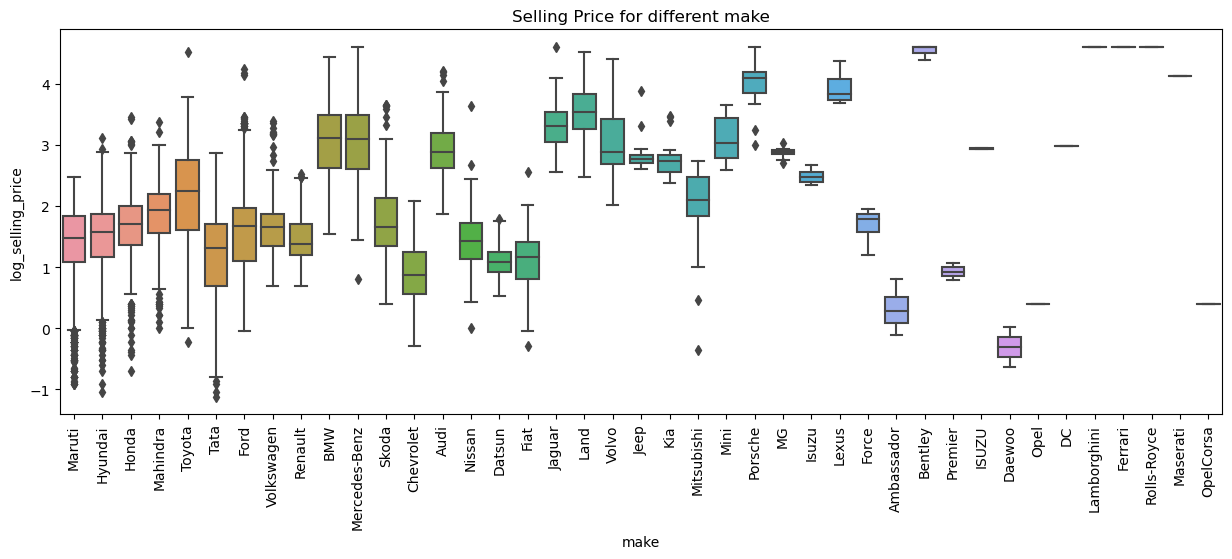

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(y='log_selling_price',x='make', data=data, order = data['make'].value_counts().index)
plt.xticks(rotation=90);
plt.title("Selling Price for different make")
plt.show()

In [44]:
#lets drop this column for now

In [45]:
data.drop(columns=['log_selling_price'],axis=1,inplace=True)

In [46]:
#How should we treat number of seats? Continuous OR Categorical ?

Number of seats is a variable with a finite discrete set of values. However it is orderd. If we make it categorical, it would be fed into the model as unordered.

But we need to think do we want that order? Example 2 seater cars are most likely more expensive than other cars. So in this sense 2 > 5. We actually would benefit from discarding the order.

In [47]:
#Can you convert number of seats to a variable which has 9 unique values with 3 categories?

Merge some elements. Eg all cars with > 5 seats are on category.

# Feature Engineering

In [48]:
data.head()

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model
0,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0,Maruti,SX4ZxiBSIII
1,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0,Hyundai,i20Sportz1.4CRDi
2,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0,Maruti,SwiftVDIBSIV
3,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0,Honda,City1.3EXI
4,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0,Volkswagen,Polo1.2MPIComfortline


# 1. Year

Sometimes it is good practice to convert the features into the way we actually understand. This will not necessarily help the model, but helps in us in understanding / interpreting predictions little better

So lets convert year to more readable age

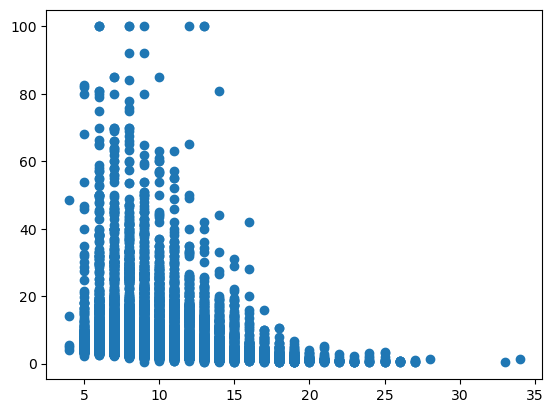

In [49]:
current_year = 2025
age = current_year-data['year']
plt.scatter(age, data.selling_price)

In [50]:
#Higher slling price for newer cars

2.Catrgorical encoding

2.1 Transmission type

In [51]:
transmission_dummy = pd.get_dummies(data['transmission_type'])
data= pd.concat([data,transmission_dummy],axis=1)

In [52]:
data

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model,Automatic,Manual
0,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0,Maruti,SX4ZxiBSIII,0,1
1,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0,Hyundai,i20Sportz1.4CRDi,0,1
2,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0,Maruti,SwiftVDIBSIV,0,1
3,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0,Honda,City1.3EXI,0,1
4,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0,Volkswagen,Polo1.2MPIComfortline,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13981,10.40,2019.0,Individual,4500,Petrol,Manual,19.01,1462.0,103.20,6.0,Maruti,XL6Alpha,0,1
13982,5.50,2018.0,Individual,17000,Petrol,Manual,18.15,1198.0,82.00,5.0,Mahindra,KUV100NXTG80K85StrBSIV,0,1
13983,5.51,2015.0,Dealer,45665,Diesel,Manual,19.87,1461.0,83.14,5.0,Nissan,TerranoXLDOption,0,1
13984,5.40,2011.0,Dealer,106000,Diesel,Manual,13.60,2523.0,63.00,7.0,Mahindra,BoleroSLE,0,1


In [53]:
data= data.drop(['transmission_type','Automatic'],axis=1)

In [54]:
data.head(3)

,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,make,model,Manual
0,2.85,2007.0,Individual,110000,Petrol,15.0,1586.0,104.68,5.0,Maruti,SX4ZxiBSIII,1
1,4.70,2012.0,Dealer,70000,Diesel,21.9,1396.0,88.76,5.0,Hyundai,i20Sportz1.4CRDi,1
2,5.25,2015.0,Individual,70000,Diesel,25.2,1248.0,74.00,5.0,Maruti,SwiftVDIBSIV,1


In [55]:
data= data.rename(columns={'Manual':'Transmission_type'})

In [56]:
data.sample(frac=1).head(2)

,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,make,model,Transmission_type
9097,3.99,2016.0,Dealer,87187,Diesel,27.62,793.0,47.0,5.0,Maruti,CelerioVDIOptional,1
3279,3.90,2013.0,Trustmark Dealer,50205,Diesel,23.40,1248.0,74.0,5.0,Maruti,SwiftDzireLDI,1


In [57]:
data['Transmission_type'].value_counts()

1    11251
0     2735
Name: Transmission_type, dtype: int64

2.2 fuel_type

In [58]:
fuel_type_dummies= pd.get_dummies(data['fuel_type'], prefix='seats')
fuel_type_dummies.sample(frac=1).head(2)

,seats_CNG,seats_Diesel,seats_Electric,seats_LPG,seats_Petrol
5094,0,1,0,0,0
599,1,0,0,0,0


In [59]:
#We remove 1 of the dummy variables to avoid the dummy variable trap

In [60]:
fuel_type_dummy = fuel_type_dummies[fuel_type_dummies.columns[1:]]
fuel_type_dummy.head(2)

,seats_Diesel,seats_Electric,seats_LPG,seats_Petrol
0,0,0,0,1
1,1,0,0,0


In [61]:
pd.concat([data,fuel_type_dummy],axis=1).sample(frac=1).head(2)

,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,make,model,Transmission_type,seats_Diesel,seats_Electric,seats_LPG,seats_Petrol
6353,5.55,2014.0,Dealer,43612,Petrol,20.73,1373.0,91.1,5.0,Maruti,CiazVXiPlus,1,0,0,0,1
557,1.50,2012.0,Individual,100000,Diesel,12.80,1995.0,52.0,5.0,Ambassador,Classic2000Dsz,1,1,0,0,0


2.3 make (too many categories)

In [62]:
data.make.nunique()

41

In [63]:
#Traget encoding for make

In [64]:
encoded_make = data.groupby('make')['selling_price'].transform('mean')

In [65]:
encoded_make.head()

0    4.648484
1    5.344764
2    4.648484
3    5.911203
4    5.632862
Name: selling_price, dtype: float64

In [66]:
show_df= data[['make']].copy()
show_df['encoded_make']= encoded_make
show_df

,make,encoded_make
0,Maruti,4.648484
1,Hyundai,5.344764
2,Maruti,4.648484
3,Honda,5.911203
4,Volkswagen,5.632862
...,...,...
13981,Maruti,4.648484
13982,Mahindra,7.290011
13983,Nissan,4.691980
13984,Mahindra,7.290011


In [67]:
show_df.duplicated().value_counts()

True     13945
False       41
dtype: int64

In [68]:
show_df= show_df.drop_duplicates()

In [69]:
show_df.shape[0]

41

In [70]:
show_df.head()

,make,encoded_make
0,Maruti,4.648484
1,Hyundai,5.344764
3,Honda,5.911203
4,Volkswagen,5.632862
5,Toyota,11.179478


3.Scaling

In [71]:
data.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats,Transmission_type
count,13986.000000,13986.000000,1.398600e+04,13986.000000,13986.000000,13986.000000,13986.000000,13986.000000
mean,7.327126,2014.516088,5.797629e+04,19.356221,1473.574905,97.685631,5.313242,0.804447
std,8.310745,3.256795,5.378180e+04,4.638576,518.289204,45.067944,0.831653,0.396640
min,0.325000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000,0.000000
25%,3.400000,2013.000000,3.100000e+04,16.840000,1197.000000,73.900000,5.000000,1.000000
50%,5.100000,2015.000000,5.120000e+04,19.160000,1248.000000,86.700000,5.000000,1.000000
75%,7.800000,2017.000000,7.397800e+04,22.320000,1582.000000,112.000000,5.000000,1.000000
max,100.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000,1.000000


In [72]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler= MinMaxScaler()
scaler.fit(data[['selling_price','km_driven','mileage']])
scaled_values = scaler.transform(data[['selling_price','km_driven','mileage']])
scaled_df= pd.DataFrame(scaled_values, columns=['selling_price','km_driven','mileage'])
scaled_df.head()

,selling_price,km_driven,mileage
0,0.025332,0.028922,0.125000
1,0.043893,0.018395,0.182500
2,0.049411,0.018395,0.210000
3,0.009280,0.023659,0.108333
4,0.043391,0.010763,0.137250


In [73]:
scaled_df.describe()

,selling_price,km_driven,mileage
count,13986.000000,13986.000000,13986.000000
mean,0.070250,0.015231,0.161302
std,0.083378,0.014153,0.038655
min,0.000000,0.000000,0.000000
25%,0.030850,0.008132,0.140333
50%,0.047906,0.013448,0.159667
75%,0.074994,0.019442,0.186000
max,1.000000,1.000000,1.000000


Stiching it all together

In [74]:
def merge_seats(x):
    if 2<=x <=4:
        return '2-4'
    elif x>5:
        return '>5'
    else:
        return '5'

In [75]:
def preprocess(data):
    """
    Clean raw car‑listing data for price‑prediction models.
    """
    # 1. Remove rows with zero mileage
    data = data.loc[data["mileage"] != 0].copy()

    # 2. Cap extreme prices at the 95th percentile
    outlier_threshold = data["selling_price"].quantile(0.95)
    data.loc[data["selling_price"] > outlier_threshold, "selling_price"] = outlier_threshold

    # 3. Add vehicle age (current UTC year − listing's model year)
    current_year = pd.Timestamp.utcnow().year          
    data["age"] = current_year - data["year"]

    # 4. Standardise text and merge seat classes
    data["full_name"] = data["full_name"].str.upper().str.strip()
    data["seats"] = data["seats"].apply(merge_seats)       # make sure merge_seats is defined

    # 5. Drop columns no longer needed
    data = data.drop(columns=["year"])                     # reassign to keep the change

    return data


In [76]:
def feature_engineering(data):
    data['make'] = data.full_name.apply(lambda x : x.split()[0])
    data['model'] = data.full_name.apply(lambda x : " ".join(x.split()[1:]))
    one_hot_encode_cols = ['seller_type', 'fuel_type', 'transmission_type', 'seats']
    for column in one_hot_encode_cols:
        data = pd.concat([data, pd.get_dummies(data[column]).iloc[: , 1:]], axis=1)
    data.drop(columns=one_hot_encode_cols + ['full_name'], inplace=True)
    data['make'] = data.groupby('make')['selling_price'].transform('median')
    data['model'] = data.groupby('model')['selling_price'].transform('median')
    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    return data

In [77]:
data.shape

(13986, 12)

<Axes: >

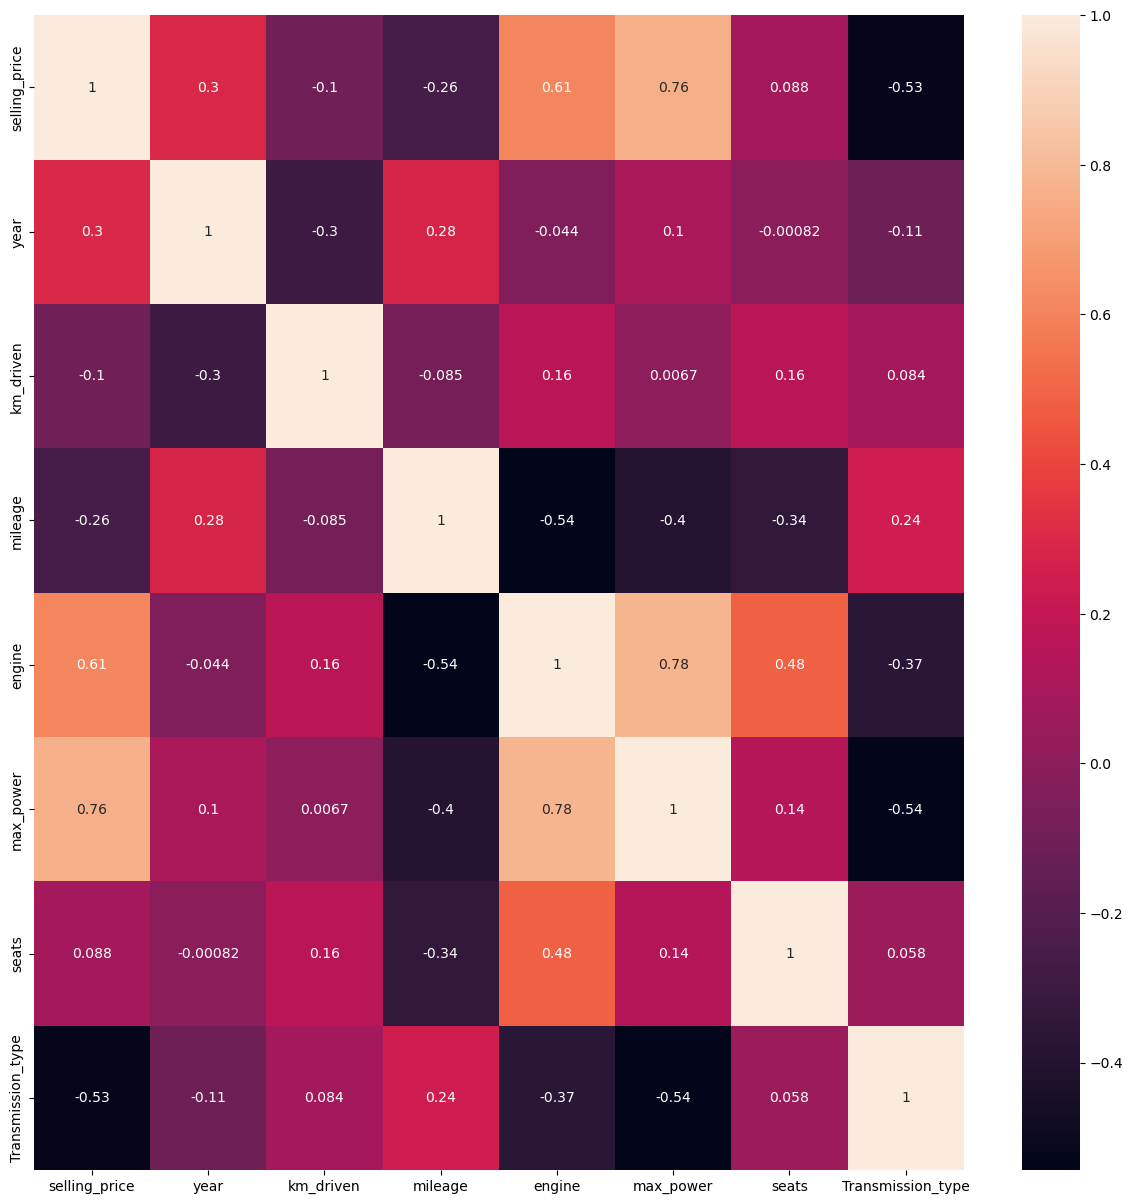

In [78]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

In [79]:
data =pd.read_csv('cars24_car_price.csv')
data=preprocess(data)
data=feature_engineering(data)
data.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.122128,0.028922,0.094828,0.234893,0.160515,0.482759,0.179031,0.093108,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.211608,0.018395,0.154310,0.206754,0.134879,0.310345,0.203759,0.200726,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.238210,0.018395,0.182759,0.184834,0.111111,0.206897,0.179031,0.224184,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.044740,0.023659,0.077586,0.198904,0.136876,0.551724,0.233432,0.087062,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.209190,0.010763,0.107500,0.177429,0.111111,0.206897,0.218595,0.229504,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [80]:
data.shape

(13868, 17)

<Axes: >

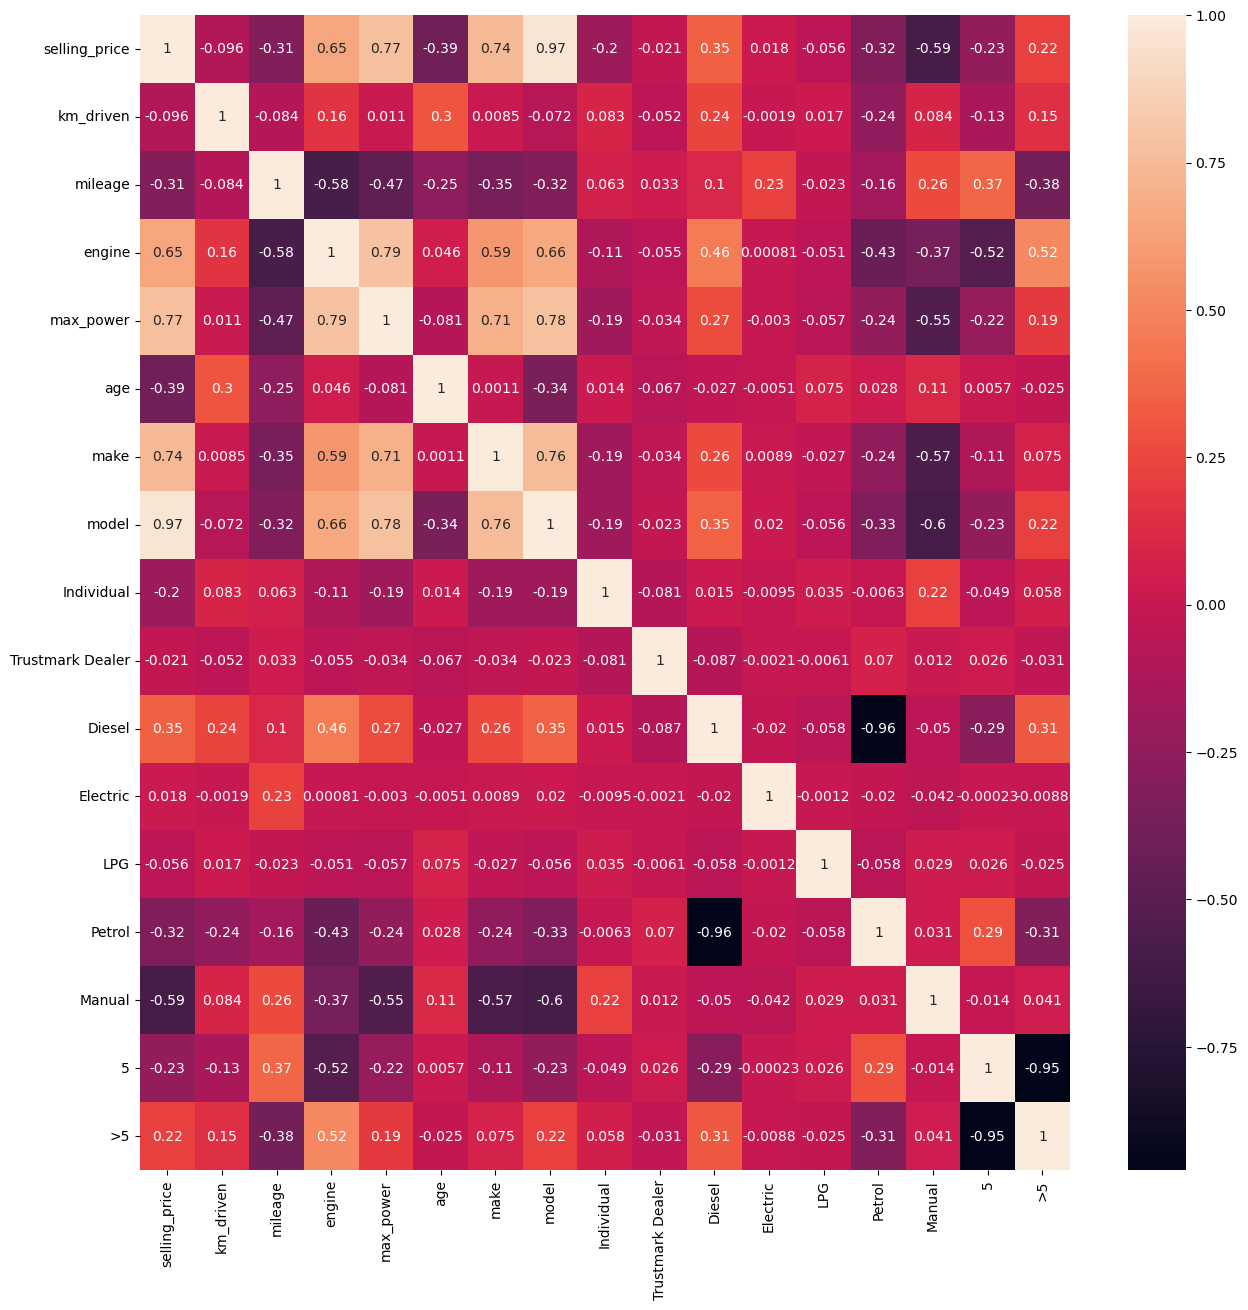

In [81]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X=data.drop(columns=['selling_price'],axis=1)
y= data['selling_price']

In [84]:
X_train,X_test,y_train,y_test= train_test_split(X.values,y.values,test_size=0.2,random_state=5)

# Scratch Implementation of Linear Regression

In [85]:
def hypothesis(x,weight):
    return np.dot(x,weight)

In [86]:
def mse(x,weight):
    n=x.shape[0]
    e=0.0
    y_hat = hypothesis(x,weight)
    error= np.sum((y_hat-y)**2)
    return e/n

In [87]:
def gradient(x,y, weight):
    n=x.shape[0]
    y_hat = hypothesis(x,weight)
    grad = np.dot((y_hat-y),x.T)
    return grad/n

In [88]:
def gradinet_descent(x,y, learning_rate=0.1, epochs=500):
    m=x.shape[1]
    weight=np.zeros((n,1))
    error_list=[]
    for i in range(epochs):
        error=mse(x,y, weight)
        error_list.append(error)
        grad = gradient(x,y, weight)
        grad_descent = weight- learning_rate*(grad)
        return error_list, weight

# Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
reg=LinearRegression()

In [91]:
reg.fit(X_train,y_train)

LinearRegression()

In [92]:
y_pred = reg.predict(X_test)

In [93]:
y_pred

array([0.08029983, 0.21251595, 0.17137064, ..., 0.71067241, 0.36182655,
       0.44557586])

In [94]:
from sklearn.metrics import r2_score, mean_squared_error

In [95]:
mean_squared_error(y_pred,y_test)

0.0030009763048505726

In [96]:
r2_score(y_test,y_pred)

0.9470434034961562

In [97]:
results = pd.DataFrame(columns=['Actual','Predicted'])
results['Actual']=y_test
results['Predicted']=y_pred
results=results.reset_index()
results['id']=results.index
results.head(10)

,index,Actual,Predicted,id
0,0,0.126965,0.080300,0
1,1,0.214027,0.212516,1
2,2,0.187424,0.171371,2
3,3,0.182588,0.229220,3
4,4,1.000000,1.028446,4
5,5,0.129383,0.141901,5
6,6,0.274486,0.278101,6
7,7,0.056832,0.018507,7
8,8,0.347037,0.387931,8
9,9,0.262394,0.215213,9


[]

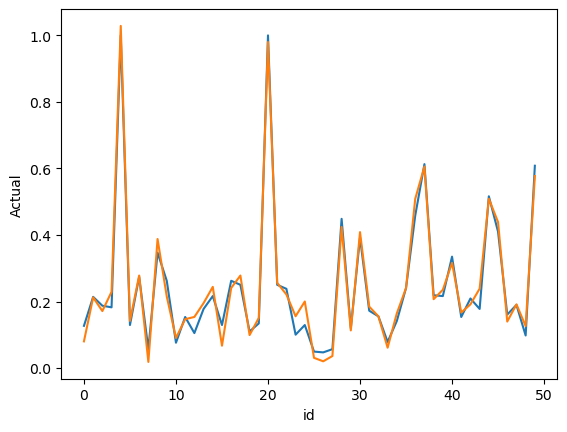

In [98]:
sns.lineplot(x='id',y='Actual',data=results.head(50))
sns.lineplot(x='id',y='Predicted',data=results.head(50))
plt.plot()

[]

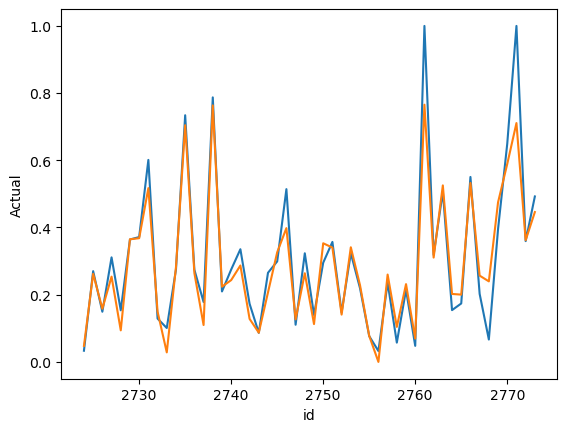

In [99]:
sns.lineplot(x='id',y='Actual',data=results.tail(50))
sns.lineplot(x='id',y='Predicted',data=results.tail(50))
plt.plot()

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

elastic_regressor = GridSearchCV(elastic, parameters)

elastic_regressor.fit(X_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [102]:
elastic_regressor.best_params_

{'alpha': 0.0001}

In [103]:
elastic=ElasticNet(alpha=.01)
elastic.fit(X_train,y_train)
y_pred_elastic=elastic.predict(X_test)

In [104]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_elastic)

0.9083346457367669

In [105]:
results = pd.DataFrame(columns=['Actual','Predicted'])
results['Actual']=y_test
results['Predicted']=y_pred_elastic
results=results.reset_index()
results['id']=results.index
results.head(10)

,index,Actual,Predicted,id
0,0,0.126965,0.137224,0
1,1,0.214027,0.209215,1
2,2,0.187424,0.201128,2
3,3,0.182588,0.240371,3
4,4,1.000000,0.870490,4
5,5,0.129383,0.174848,5
6,6,0.274486,0.281556,6
7,7,0.056832,0.103498,7
8,8,0.347037,0.375408,8
9,9,0.262394,0.252926,9


[]

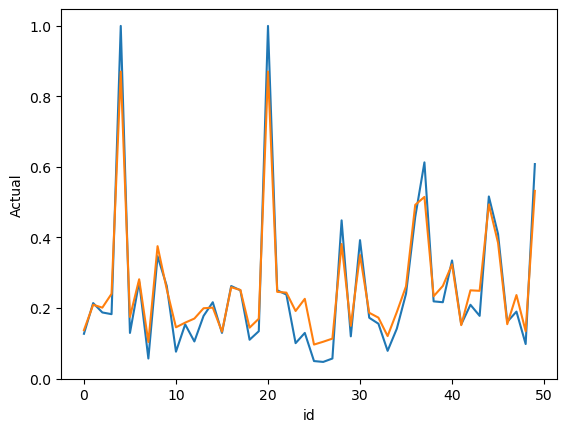

In [106]:
sns.lineplot(x='id',y='Actual',data=results.head(50))
sns.lineplot(x='id',y='Predicted',data=results.head(50))
plt.plot()